In [4]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge([r,g,b]) # merge in rgb order to display with matplotlib

In [23]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

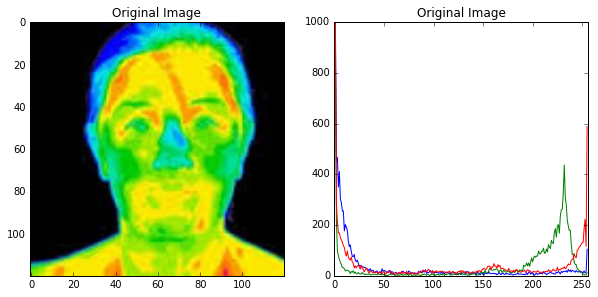

In [18]:
img_original = cv2.imread('../colorImages/face_thermogram.jpg')
img = cv2.imread('../colorImages/face_thermogram_2.jpg')

plt.figure(figsize=(10,10)) 

plt.subplot(221)
plt.imshow(invertChannels(img_original))
plt.title('Original Image')

plt.subplot(222)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_original],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256]) 
    plt.ylim([0,1000])
plt.title('Original Image') 

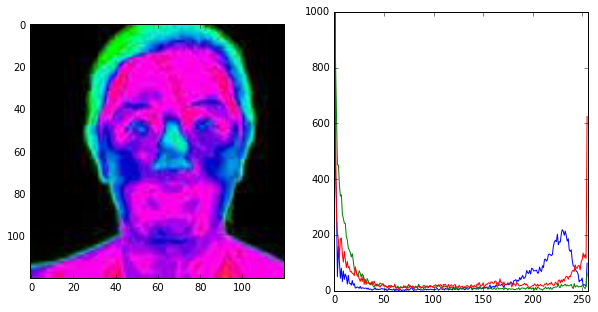

In [20]:
plt.figure(figsize=(10,5)) 
plt.subplot(121)
plt.imshow(invertChannels(img))

plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    
    plt.ylim([0,1000])

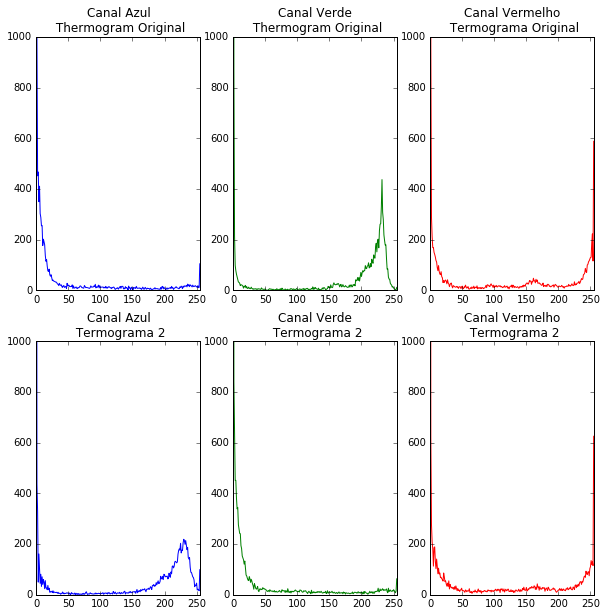

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(231)
histr = cv2.calcHist([img_original],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 
plt.ylim([0,1000])
plt.title('Canal Azul\n Thermogram Original')   

plt.subplot(232)
histr = cv2.calcHist([img_original],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Verde\n Thermogram Original')  

plt.subplot(233)
histr = cv2.calcHist([img_original],[2],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Vermelho\n Termograma Original')  

plt.subplot(234)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 
plt.ylim([0,1000])
plt.title('Canal Azul\n Termograma 2')   

plt.subplot(235)
histr = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Verde\n Termograma 2')  

plt.subplot(236)
histr = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Vermelho\n Termograma 2')  

# Problema: Canal de cor trocado

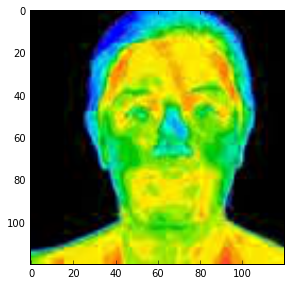

In [31]:
plt.figure(figsize=(10,5)) 
# trocar canais de cor verde e azul
b,g,r = cv2.split(img) # split channels
img_enhanced = cv2.merge([g,b,r])

plt.subplot(121)
plt.imshow(invertChannels(img_enhanced))


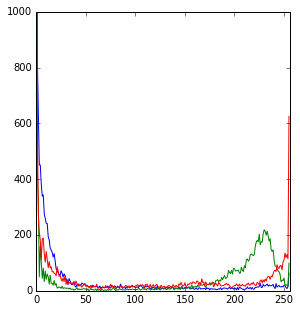

In [34]:
plt.figure(figsize=(10,5)) 
plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_enhanced],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256]) 
    plt.ylim([0,1000])

In [29]:
# mean square error comparation
print "MSE between Original and Iris2: %s" % mse(img_original,img)
print "MSE between Original and Iris enchanced: %s" % mse(img_original,img_enhanced)

MSE between Original and Iris2: 43138.4773611
MSE between Original and Iris enchanced: 274.252638889
